In [4]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
   
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    
    sentimentVector['initTime'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in sentimentVector['initTime']]

    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    
    
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,pd.rolling_mean(sentimentVector,5)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,10)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,15)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,20)),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    print(file)
    print(meanvector.shape)
    sentiment.append(meanvector)
    prices.append(price)

AAPL
(5795, 40)
AMZN
(5801, 40)
PEP
(3398, 40)
GOOGL
(5795, 40)
MSFT
(5794, 40)
FB
(5802, 40)
INTC
(5802, 40)
CSCO
(5768, 40)
CMCSA
(5801, 40)
NVDA
(5802, 40)
NFLX
(5801, 40)
BKNG
(2133, 40)
ADBE
(5788, 40)
AMGN
(5760, 40)
TXN
(5800, 40)
AVGO
(5776, 40)
PYPL
(5790, 40)
GILD
(5785, 40)
COST
(5777, 40)
QCOM
(5800, 40)


In [5]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.3477406679764244
G-score: 0.40250196164415686
Accuracy 0.41238938053097346
Window: 140
[[289 217]
 [447 177]]
Vol pos 3.7873299181611544
Vol neg 2.7437389762635087


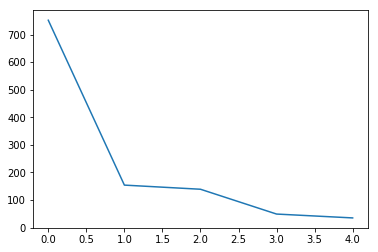

Real Percentage of gain: -95.86605402185063
Percentage of gain: -0.05039552068661212
Total gain: -56.946938375871696
000000000000000000000000000000000000000000000000
Percentile:  0
[[218 160]
 [320  55]]
0.36254980079681276
Percentile:  1
[[34 34]
 [61 23]]
0.375
Percentile:  2
[[37 23]
 [24 55]]
0.6618705035971223
Percentile:  3
[[ 0  0]
 [23 26]]
0.5306122448979592
Percentile:  4
[[ 0  0]
 [17 18]]
0.5142857142857142
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.12981744421906694
G-score: 0.24653286310642308
Accuracy 0.2420494699646643
Window: 140
[[210  41]
 [817  64]]
Vol pos 2.288787773741014
Vol neg 2.386623378781875


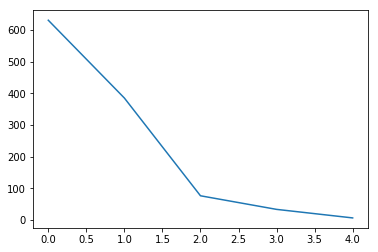

Real Percentage of gain: -230.25233185777645
Percentage of gain: -1.2549425874468292
Total gain: -1420.5950089898106
000000000000000000000000000000000000000000000000
Percentile:  0
[[187  12]
 [413  18]]
0.3253968253968254
Percentile:  1
[[ 15  21]
 [340   9]]
0.06233766233766234
Percentile:  2
[[ 8  8]
 [50 10]]
0.23684210526315788
Percentile:  3
[[ 0  0]
 [ 9 24]]
0.7272727272727273
Percentile:  4
[[0 0]
 [4 2]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.12353923205342238
G-score: 0.2542032833426162
Accuracy 0.1935483870967742
Window: 140
[[ 89   2]
 [523  37]]
Vol pos 1.0116057559082643
Vol neg 2.3393705851930524


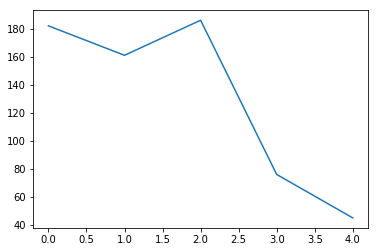

Real Percentage of gain: -102.34194552002837
Percentage of gain: -1.6907945191734428
Total gain: -1100.7072319819113
000000000000000000000000000000000000000000000000
Percentile:  0
[[70  2]
 [99 11]]
0.44505494505494503
Percentile:  1
[[ 19   0]
 [141   1]]
0.12422360248447205
Percentile:  2
[[  0   0]
 [163  23]]
0.12365591397849462
Percentile:  3
[[ 0  0]
 [74  2]]
0.02631578947368421
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.46113989637305697
G-score: 0.4558237990444727
Accuracy 0.44778761061946903
Window: 140
[[239 216]
 [408 267]]
Vol pos 2.7747792726072364
Vol neg 3.101669832594836


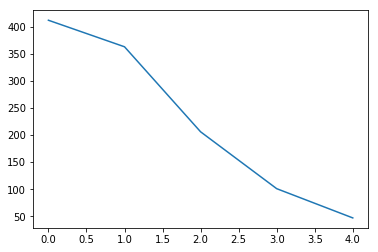

Real Percentage of gain: -67.50249122195405
Percentage of gain: -0.4702687288494831
Total gain: -531.403663599916
000000000000000000000000000000000000000000000000
Percentile:  0
[[141  91]
 [ 91  88]]
0.5571776155717761
Percentile:  1
[[ 42  69]
 [161  91]]
0.36639118457300274
Percentile:  2
[[52 45]
 [79 30]]
0.39805825242718446
Percentile:  3
[[ 3 11]
 [63 24]]
0.26732673267326734
Percentile:  4
[[ 0  0]
 [14 33]]
0.7021276595744681
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.21305841924398627
G-score: 0.3305473536795921
Accuracy 0.3920353982300885
Window: 140
[[350  69]
 [618  93]]
Vol pos 1.2140711910161714
Vol neg 1.8079198193331756


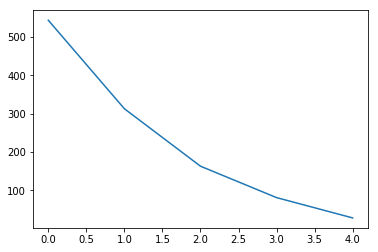

Real Percentage of gain: -56.07304219943631
Percentage of gain: -0.6231923701431218
Total gain: -704.2073782617276
000000000000000000000000000000000000000000000000
Percentile:  0
[[264  28]
 [227  25]]
0.53125
Percentile:  1
[[ 57  17]
 [205  34]]
0.29073482428115016
Percentile:  2
[[ 14   9]
 [115  25]]
0.2392638036809816
Percentile:  3
[[11  9]
 [59  2]]
0.16049382716049382
Percentile:  4
[[ 4  6]
 [12  6]]
0.35714285714285715
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5856515373352855
G-score: 0.5390093232088131
Accuracy 0.5
Window: 140
[[166  97]
 [469 400]]
Vol pos 3.3221084538479
Vol neg 2.833231121379881


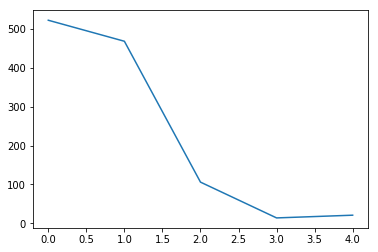

Real Percentage of gain: -48.086213334166985
Percentage of gain: 0.2444386662340096
Total gain: 276.70457017689887
000000000000000000000000000000000000000000000000
Percentile:  0
[[162  50]
 [220  90]]
0.4827586206896552
Percentile:  1
[[  3  34]
 [222 209]]
0.452991452991453
Percentile:  2
[[ 0 13]
 [22 70]]
0.6666666666666666
Percentile:  3
[[ 0  0]
 [ 4 10]]
0.7142857142857143
Percentile:  4
[[ 0  0]
 [ 1 20]]
0.9523809523809523
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.12021857923497269
G-score: 0.2524938273148083
Accuracy 0.43109540636042404
Window: 140
[[444   4]
 [640  44]]
Vol pos 2.6738539981268707
Vol neg 2.0701031060366053


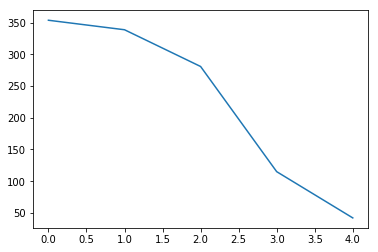

Real Percentage of gain: -90.31136083881458
Percentage of gain: -0.025004990460831295
Total gain: -28.305649201661026
000000000000000000000000000000000000000000000000
Percentile:  0
[[112   4]
 [235   3]]
0.3248587570621469
Percentile:  1
[[114   0]
 [211  17]]
0.3830409356725146
Percentile:  2
[[127   0]
 [131  20]]
0.5287769784172662
Percentile:  3
[[63  0]
 [47  4]]
0.5877192982456141
Percentile:  4
[[28  0]
 [14  0]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.4377431906614786
G-score: 0.4841417129618933
Accuracy 0.4862222222222222
Window: 140
[[322 155]
 [423 225]]
Vol pos 2.254006270640536
Vol neg 1.4513401144125768


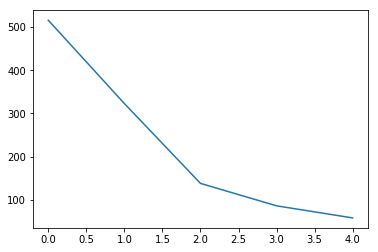

Real Percentage of gain: -16.107946686784867
Percentage of gain: 0.3502816390310256
Total gain: 394.0668439099038
000000000000000000000000000000000000000000000000
Percentile:  0
[[133  87]
 [224  72]]
0.39728682170542634
Percentile:  1
[[ 48  48]
 [133  94]]
0.43962848297213625
Percentile:  2
[[34 16]
 [34 54]]
0.6376811594202898
Percentile:  3
[[54  4]
 [24  4]]
0.6744186046511628
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.5925925925925926
G-score: 0.4772082645216108
Accuracy 0.5141342756183745
Window: 140
[[182 358]
 [192 400]]
Vol pos 2.9281530723741653
Vol neg 2.7815946256274895


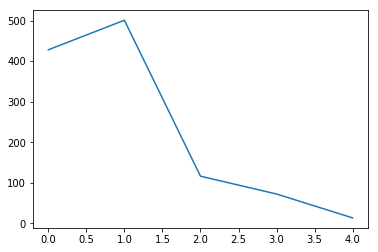

Real Percentage of gain: 93.46378062227339
Percentage of gain: 0.1539823710482731
Total gain: 174.30804402664512
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 72 155]
 [ 61 140]]
0.4953271028037383
Percentile:  1
[[ 48 149]
 [ 97 207]]
0.5089820359281437
Percentile:  2
[[17 25]
 [31 43]]
0.5172413793103449
Percentile:  3
[[39 21]
 [ 2 10]]
0.6805555555555556
Percentile:  4
[[6 7]
 [0 0]]
0.46153846153846156
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5304659498207885
G-score: 0.5438357539930345
Accuracy 0.5371024734982333
Window: 140
[[312 164]
 [360 296]]
Vol pos 3.9797594931957683
Vol neg 3.526100263442742


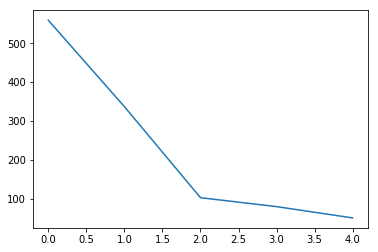

Real Percentage of gain: 48.30963311266469
Percentage of gain: 0.5053155775786486
Total gain: 572.0172338190303
000000000000000000000000000000000000000000000000
Percentile:  0
[[214  99]
 [175  71]]
0.5098389982110912
Percentile:  1
[[ 97  20]
 [124  96]]
0.5727002967359051
Percentile:  2
[[ 1 30]
 [27 45]]
0.44660194174757284
Percentile:  3
[[ 0 15]
 [17 48]]
0.6
Percentile:  4
[[ 0  0]
 [15 36]]
0.7058823529411765
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.15539858728557013
G-score: 0.2601669627857693
Accuracy 0.26060070671378094
Window: 140
[[218  79]
 [758  77]]
Vol pos 3.0563937864599198
Vol neg 4.787896447741564


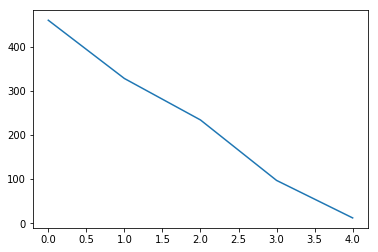

Real Percentage of gain: -355.595842079389
Percentage of gain: -2.7436688690406474
Total gain: -3105.8331597540127
000000000000000000000000000000000000000000000000
Percentile:  0
[[138  32]
 [269  21]]
0.3456521739130435
Percentile:  1
[[ 49  11]
 [223  45]]
0.2865853658536585
Percentile:  2
[[ 21  17]
 [184  11]]
0.13733905579399142
Percentile:  3
[[ 8 19]
 [70  0]]
0.08247422680412371
Percentile:  4
[[ 1  0]
 [11  0]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.8161120840630472
G-score: 0.6322113773593278
Accuracy 0.7361809045226131
Window: 140
[[ 60  71]
 [ 34 233]]
Vol pos 1.4567042021481067
Vol neg 0.4116816221112507


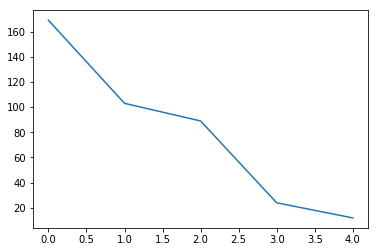

Real Percentage of gain: 232.40221525625103
Percentage of gain: 0.9637883439892311
Total gain: 383.58776090771397
000000000000000000000000000000000000000000000000
Percentile:  0
[[32 65]
 [30 45]]
0.4476744186046512
Percentile:  1
[[20  6]
 [ 4 70]]
0.9
Percentile:  2
[[ 7  0]
 [ 0 82]]
1.0
Percentile:  3
[[23]]
1.0
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.145679012345679
G-score: 0.2785139412005233
Accuracy 0.3870682019486271
Window: 140
[[378  10]
 [682  59]]
Vol pos 1.8785914471597611
Vol neg 3.061112108849446


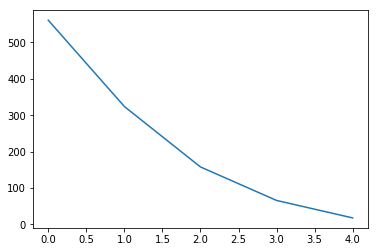

Real Percentage of gain: -224.26291029534212
Percentage of gain: -1.149109935265723
Total gain: -1297.3451169150012
000000000000000000000000000000000000000000000000
Percentile:  0
[[267  10]
 [254  30]]
0.5294117647058824
Percentile:  1
[[ 63   0]
 [234  27]]
0.2777777777777778
Percentile:  2
[[ 25   0]
 [131   2]]
0.17088607594936708
Percentile:  3
[[23  0]
 [43  0]]
0.3484848484848485
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7215363511659807
G-score: 0.6252832483941109
Accuracy 0.6384683882457702
Window: 140
[[191 129]
 [277 526]]
Vol pos 2.1384114387640483
Vol neg 1.5653907733447936


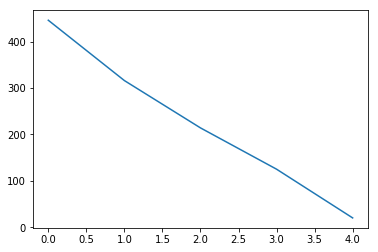

Real Percentage of gain: 211.56209409832888
Percentage of gain: 0.7993698554014572
Total gain: 897.6923476158364
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76  89]
 [127 154]]
0.515695067264574
Percentile:  1
[[ 43  12]
 [ 79 182]]
0.7120253164556962
Percentile:  2
[[ 21   5]
 [ 55 133]]
0.719626168224299
Percentile:  3
[[40 16]
 [15 54]]
0.752
Percentile:  4
[[10  7]
 [ 0  3]]
0.65
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.5896346644010195
G-score: 0.6099044567391022
Accuracy 0.5729442970822282
Window: 140
[[301  67]
 [416 347]]
Vol pos 2.2526698001397505
Vol neg 2.8220908332725663


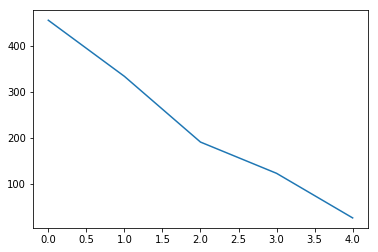

Real Percentage of gain: 45.46759021720538
Percentage of gain: 0.08546433069841622
Total gain: 96.66015801990875
000000000000000000000000000000000000000000000000
Percentile:  0
[[195  13]
 [149  98]]
0.643956043956044
Percentile:  1
[[106  23]
 [107  98]]
0.6107784431137725
Percentile:  2
[[ 0 14]
 [98 80]]
0.4166666666666667
Percentile:  3
[[ 0 10]
 [59 53]]
0.4344262295081967
Percentile:  4
[[ 0  7]
 [ 2 17]]
0.6538461538461539
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.7206528562460766
G-score: 0.460189997504971
Accuracy 0.6051464063886424
Window: 140
[[108 298]
 [147 574]]
Vol pos 3.8219671318354838
Vol neg 2.251666421869564


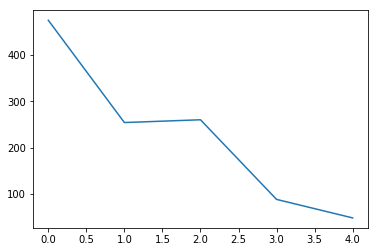

Real Percentage of gain: 118.05828745931603
Percentage of gain: 1.4237710968765254
Total gain: 1604.590026179844
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 20 181]
 [ 71 203]]
0.4694736842105263
Percentile:  1
[[ 16  88]
 [ 14 136]]
0.5984251968503937
Percentile:  2
[[ 10  28]
 [ 58 164]]
0.6692307692307692
Percentile:  3
[[24  1]
 [ 4 59]]
0.9431818181818182
Percentile:  4
[[37  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.5275532696546656
G-score: 0.4204603985839905
Accuracy 0.4304694419840567
Window: 140
[[127 191]
 [452 359]]
Vol pos 2.6700799074506505
Vol neg 3.0911506008804026


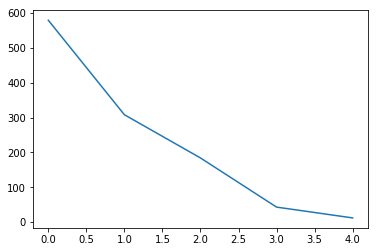

Real Percentage of gain: -96.83083811867647
Percentage of gain: -0.6111169188176111
Total gain: -689.9510013450829
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 58  76]
 [244 201]]
0.4473229706390328
Percentile:  1
[[ 18  33]
 [143 114]]
0.42857142857142855
Percentile:  2
[[46 74]
 [30 34]]
0.43478260869565216
Percentile:  3
[[ 5  8]
 [22  8]]
0.3023255813953488
Percentile:  4
[[ 0  0]
 [12  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.6511007338225484
G-score: 0.42388205211943547
Accuracy 0.5363475177304965
Window: 140
[[117 465]
 [ 58 488]]
Vol pos 3.376650622347762
Vol neg 3.0794942001865535


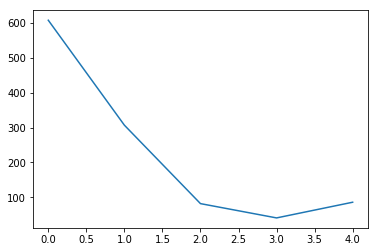

Real Percentage of gain: -41.63444050660716
Percentage of gain: 0.3832430494883231
Total gain: 432.29815982282844
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 21 318]
 [ 27 242]]
0.43256578947368424
Percentile:  1
[[ 51  52]
 [ 30 174]]
0.7328990228013029
Percentile:  2
[[ 0 12]
 [ 1 69]]
0.8414634146341463
Percentile:  3
[[ 3 38]
 [ 0  0]]
0.07317073170731707
Percentile:  4
[[41 45]
 [ 0  0]]
0.47674418604651164
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.39191564147627417
G-score: 0.4068066508870485
Accuracy 0.385980479148181
Window: 140
[[212 173]
 [519 223]]
Vol pos 1.5259786737765015
Vol neg 1.3008164685301802


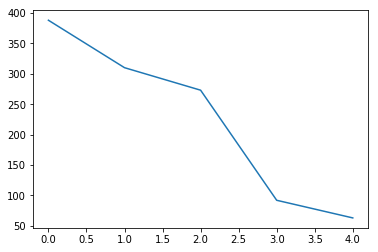

Real Percentage of gain: -51.82677656096975
Percentage of gain: -0.20972872504889656
Total gain: -236.36427313010643
000000000000000000000000000000000000000000000000
Percentile:  0
[[102  98]
 [142  45]]
0.3798449612403101
Percentile:  1
[[ 51  53]
 [146  60]]
0.3580645161290323
Percentile:  2
[[ 49  19]
 [168  37]]
0.315018315018315
Percentile:  3
[[ 9  3]
 [59 21]]
0.32608695652173914
Percentile:  4
[[ 0  0]
 [ 4 59]]
0.9365079365079365
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.6418732782369145
G-score: 0.49525848214374624
Accuracy 0.5402298850574713
Window: 140
[[145 210]
 [310 466]]
Vol pos 3.8023579249257886
Vol neg 2.8223435261027348


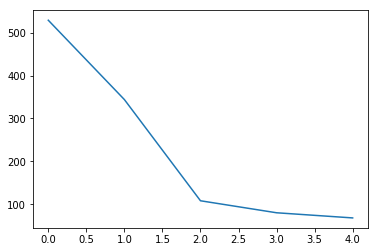

Real Percentage of gain: 29.31197352587213
Percentage of gain: 0.7565181773264675
Total gain: 855.6220585562348
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 84 146]
 [130 169]]
0.4782608695652174
Percentile:  1
[[ 11  37]
 [136 160]]
0.49709302325581395
Percentile:  2
[[ 8 10]
 [25 65]]
0.6759259259259259
Percentile:  3
[[12  0]
 [19 49]]
0.7625
Percentile:  4
[[30 16]
 [ 0 22]]
0.7647058823529411
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  -174.20561092601284
Real mean gain over portfolio -34.905830947494266


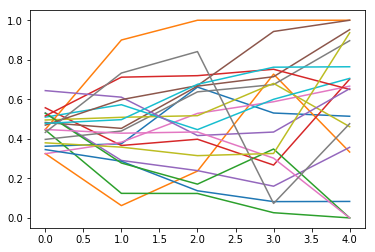

In [6]:
features=[100  ,99,  82,  84  ,53  ,52  ,51,  50,  49  ,48 , 41  ,45,  47  ,43,  77  ,46,  40,  42,
  61,  85 , 86 ,118 ,120 ,122 ,124 ,126 ,128 ,130 ,132  ,33  ,25  ,36 , 17  ,28 ,  9  ,37,
  35 , 34 , 20 , 29 ,  1 , 27  ,26  ,21,  12 , 19 , 39,  13  ,18,  11 ,  4,  38 ,  5,  10,
   3 ,111  ,63,  30  ,31  , 2]
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
       
        x=x[:,features]
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

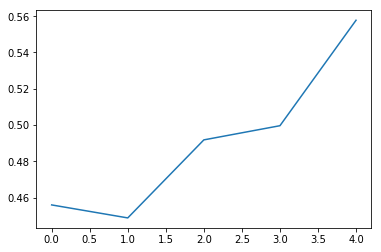

In [7]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
4.883029404294328
0.0
Diff in tren train and test
0.5174870466321243
0.5284974093264249
F1,score 0.5698924731182795
G-score: 0.5020278970186324
Accuracy 0.5164075993091537
Window: 4
[[227 319]
 [241 371]]
Vol pos 0.3337400393967737
Vol neg 0.32951092812752186


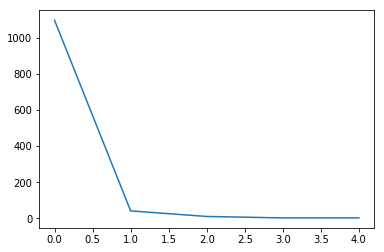

Percentage of gain: 0.012996911751173089
Total gain: 15.050423807858438
000000000000000000000000000000000000000000000000
Percentile:  0
[[215 310]
 [222 351]]
0.5154826958105647
Percentile:  1
[[11  7]
 [11 12]]
0.5609756097560976
Percentile:  2
[[1 2]
 [2 5]]
0.6
Percentile:  3
[[0 0]
 [2 0]]
0.0
Percentile:  4
[[0 0]
 [2 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMZN
7.30254087059288
0.0006159569815638473
Diff in tren train and test
0.5246926892387319
0.5496117342536669
F1,score 0.5227077977720651
G-score: 0.5219431192335618
Accuracy 0.5194132873166523
Window: 4
[[297 225]
 [332 305]]
Vol pos 0.39125890590844276
Vol neg 0.31685123708423


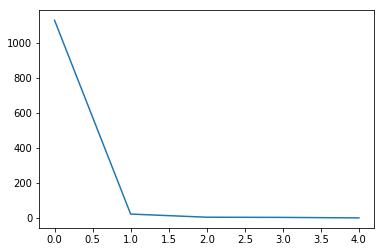

Percentage of gain: 0.05095058006985886
Total gain: 59.05172230096642
000000000000000000000000000000000000000000000000
Percentile:  0
[[284 220]
 [326 298]]
0.5159574468085106
Percentile:  1
[[11  5]
 [ 4  2]]
0.5909090909090909
Percentile:  2
[[2 0]
 [2 0]]
0.5
Percentile:  3
[[3]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.357677710534418
0.0
Diff in tren train and test
0.4725598526703499
0.588495575221239
F1,score 0.5449189985272459
G-score: 0.5529759281285919
Accuracy 0.5442477876106194
Window: 4
[[184  95]
 [214 185]]
Vol pos 0.29202680197889114
Vol neg 0.26231229665301586


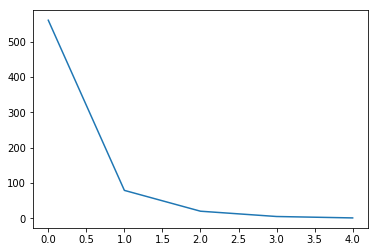

Percentage of gain: 0.0393855313634645
Total gain: 26.703390264428933
000000000000000000000000000000000000000000000000
Percentile:  0
[[162  83]
 [177 139]]
0.5365418894830659
Percentile:  1
[[17  9]
 [25 28]]
0.569620253164557
Percentile:  2
[[2 2]
 [7 9]]
0.55
Percentile:  3
[[2 1]
 [0 2]]
0.8
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.2472118959107856
0.0
Diff in tren train and test
0.5205094991364422
0.5250431778929189
F1,score 0.5477308294209703
G-score: 0.4906420946797883
Accuracy 0.5008635578583766
Window: 4
[[230 320]
 [258 350]]
Vol pos 0.394937420591884
Vol neg 0.38403202046726953


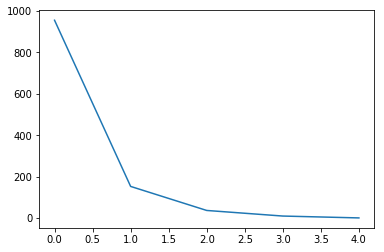

Percentage of gain: 0.0061253852445690175
Total gain: 7.093196113210922
000000000000000000000000000000000000000000000000
Percentile:  0
[[199 261]
 [221 274]]
0.4952879581151832
Percentile:  1
[[27 47]
 [24 55]]
0.5359477124183006
Percentile:  2
[[ 4  5]
 [12 16]]
0.5405405405405406
Percentile:  3
[[0 5]
 [1 4]]
0.4
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... MSFT
2.9815573770491772
0.0
Diff in tren train and test
0.5274179620034543
0.5375972342264477
F1,score 0.5279605263157896
G-score: 0.5027256895873345
Accuracy 0.5038893690579084
Window: 4
[[262 273]
 [301 321]]
Vol pos 0.3885478818708247
Vol neg 0.34447729100406016


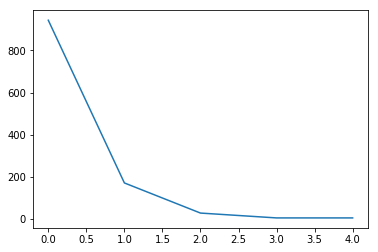

Percentage of gain: 0.024886300859429777
Total gain: 28.793450094360256
000000000000000000000000000000000000000000000000
Percentile:  0
[[210 228]
 [246 259]]
0.4973488865323436
Percentile:  1
[[39 38]
 [46 48]]
0.5087719298245614
Percentile:  2
[[ 6  6]
 [ 6 10]]
0.5714285714285714
Percentile:  3
[[3 1]
 [0 1]]
0.8
Percentile:  4
[[3 0]
 [2 0]]
0.6
000000000000000000000000000000000000000000000000
Working on... FB
8.273442632816934
0.0
Diff in tren train and test
0.5161707632600259
0.5366695427092321
F1,score 0.6615285806037251
G-score: 0.4247312445316142
Accuracy 0.545297670405522
Window: 4
[[117 420]
 [107 515]]
Vol pos 0.47457194285714227
Vol neg 0.3559677941409714


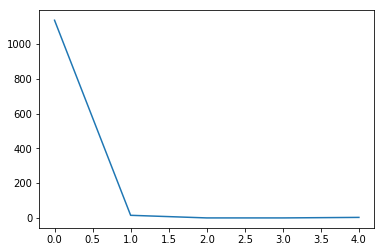

Percentage of gain: 0.09692358962331492
Total gain: 112.33444037342198
000000000000000000000000000000000000000000000000
Percentile:  0
[[113 417]
 [103 503]]
0.5422535211267606
Percentile:  1
[[4 3]
 [2 6]]
0.6666666666666666
Percentile:  2
Percentile:  3
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
4.729266745218887
0.0
Diff in tren train and test
0.5316946959896507
0.5220017256255393
F1,score 0.4277227722772277
G-score: 0.4849988827014129
Accuracy 0.5012942191544435
Window: 4
[[365 189]
 [389 216]]
Vol pos 0.4952271255726204
Vol neg 0.5139916117655124


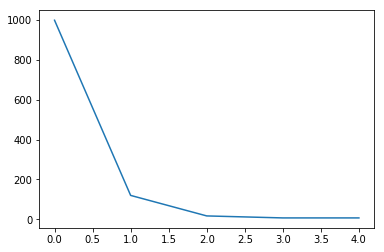

Percentage of gain: -0.008076092875559767
Total gain: -9.36019164277377
000000000000000000000000000000000000000000000000
Percentile:  0
[[323 150]
 [343 183]]
0.5065065065065065
Percentile:  1
[[27 36]
 [32 25]]
0.43333333333333335
Percentile:  2
[[6 2]
 [6 3]]
0.5294117647058824
Percentile:  3
[[5 1]
 [0 1]]
0.8571428571428571
Percentile:  4
[[3 0]
 [4 0]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... CSCO
4.705102717031152
0.0
Diff in tren train and test
0.5432661027976577
0.5329861111111112
F1,score 0.5395051875498803
G-score: 0.49244439620746894
Accuracy 0.4991319444444444
Window: 4
[[237 301]
 [276 338]]
Vol pos 0.3643105324004504
Vol neg 0.4122690088516964


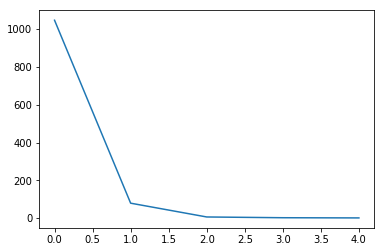

Percentage of gain: -0.02465335241073769
Total gain: -28.40066197716982
000000000000000000000000000000000000000000000000
Percentile:  0
[[228 263]
 [255 301]]
0.5052531041069723
Percentile:  1
[[ 9 31]
 [15 24]]
0.4177215189873418
Percentile:  2
[[0 3]
 [2 1]]
0.16666666666666666
Percentile:  3
[[0 2]
 [0 0]]
0.0
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.475308641975317
0.0
Diff in tren train and test
0.49773560491697216
0.5090595340811044
F1,score 0.5710165825522712
G-score: 0.44516406018609345
Accuracy 0.48662640207075064
Window: 4
[[168 401]
 [194 396]]
Vol pos 0.48371265444433753
Vol neg 0.5168434419206513


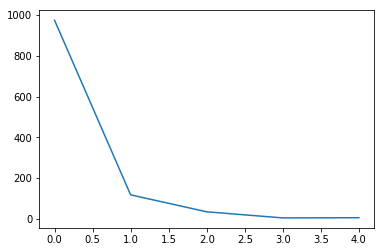

Percentage of gain: -0.029946428676601515
Total gain: -34.707910836181156
000000000000000000000000000000000000000000000000
Percentile:  0
[[146 339]
 [160 329]]
0.48767967145790553
Percentile:  1
[[16 44]
 [19 39]]
0.4661016949152542
Percentile:  2
[[ 5 16]
 [ 4 10]]
0.42857142857142855
Percentile:  3
[[0 2]
 [2 1]]
0.2
Percentile:  4
[[1 0]
 [2 3]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... NVDA
3.9791051555757524
0.0
Diff in tren train and test
0.5204829667960328
0.546160483175151
F1,score 0.5922406967537608
G-score: 0.5507099917046436
Accuracy 0.5556514236410699
Window: 4
[[270 256]
 [259 374]]
Vol pos 0.548673522424625
Vol neg 0.48399855991302776


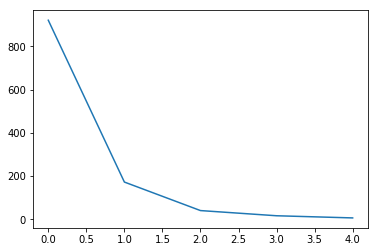

Percentage of gain: 0.0898071527922771
Total gain: 104.08649008624917
000000000000000000000000000000000000000000000000
Percentile:  0
[[209 215]
 [212 285]]
0.5363735070575462
Percentile:  1
[[46 25]
 [38 63]]
0.6337209302325582
Percentile:  2
[[ 9  9]
 [ 6 16]]
0.625
Percentile:  3
[[6 5]
 [3 2]]
0.5
Percentile:  4
[[0 1]
 [0 5]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... NFLX
4.082771472132831
0.00016525711528829872
Diff in tren train and test
0.516282078930343
0.542709232096635
F1,score 0.5287553648068669
G-score: 0.5282208894923689
Accuracy 0.5263157894736842
Window: 4
[[302 228]
 [321 308]]
Vol pos 0.5836238163048381
Vol neg 0.497060084027379


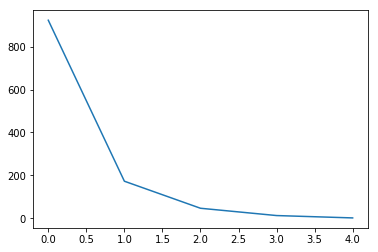

Percentage of gain: 0.07172091614747206
Total gain: 83.12454181492012
000000000000000000000000000000000000000000000000
Percentile:  0
[[253 187]
 [257 225]]
0.5184381778741866
Percentile:  1
[[29 34]
 [55 55]]
0.48554913294797686
Percentile:  2
[[12  5]
 [ 8 22]]
0.723404255319149
Percentile:  3
[[7 1]
 [1 4]]
0.8461538461538461
Percentile:  4
[[1 0]
 [0 1]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
1.1369985598232721
0.000939946799010321
Diff in tren train and test
0.5096887844979449
0.548235294117647
F1,score 0.5296803652968036
G-score: 0.5167958673658937
Accuracy 0.5152941176470588
Window: 4
[[103  89]
 [117 116]]
Vol pos 0.28518043380487573
Vol neg 0.22476103240271086


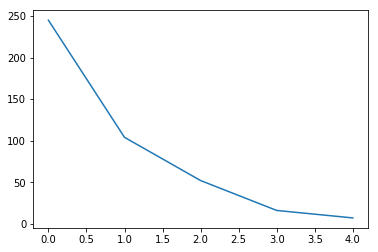

Percentage of gain: 0.03800880547837492
Total gain: 16.15374232830934
000000000000000000000000000000000000000000000000
Percentile:  0
[[60 53]
 [75 57]]
0.4775510204081633
Percentile:  1
[[17 26]
 [30 31]]
0.46153846153846156
Percentile:  2
[[19  5]
 [10 17]]
0.7058823529411765
Percentile:  3
[[4 2]
 [2 8]]
0.75
Percentile:  4
[[2 2]
 [0 3]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... ADBE
3.3983248022335957
0.0
Diff in tren train and test
0.5433326129241409
0.5501730103806228
F1,score 0.5358851674641147
G-score: 0.4917313389689923
Accuracy 0.49653979238754326
Window: 4
[[238 282]
 [300 336]]
Vol pos 0.4369486900246271
Vol neg 0.42450643874487154


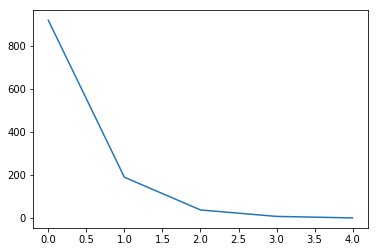

Percentage of gain: 0.0032403120455196553
Total gain: 3.7458007246207217
000000000000000000000000000000000000000000000000
Percentile:  0
[[193 223]
 [244 258]]
0.4912854030501089
Percentile:  1
[[35 49]
 [49 56]]
0.48148148148148145
Percentile:  2
[[ 9  5]
 [ 6 17]]
0.7027027027027027
Percentile:  3
[[1 4]
 [1 1]]
0.2857142857142857
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... AMGN
3.3162393162393125
0.0
Diff in tren train and test
0.5062988705473501
0.529105125977411
F1,score 0.5532271584241409
G-score: 0.5365929028219089
Accuracy 0.5369244135534318
Window: 4
[[288 254]
 [279 330]]
Vol pos 0.4246946621305283
Vol neg 0.41439530548184


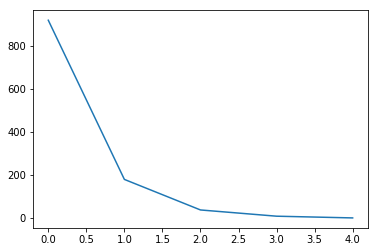

Percentage of gain: 0.036132583296998935
Total gain: 41.588603374845775
000000000000000000000000000000000000000000000000
Percentile:  0
[[238 206]
 [219 257]]
0.5380434782608695
Percentile:  1
[[38 35]
 [43 64]]
0.5666666666666667
Percentile:  2
[[ 8 12]
 [11  7]]
0.39473684210526316
Percentile:  3
[[2 1]
 [4 2]]
0.4444444444444444
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... TXN
3.62011743681389
0.0
Diff in tren train and test
0.5515530629853321
0.542709232096635
F1,score 0.6714659685863875
G-score: 0.47073519617855075
Accuracy 0.5668679896462467
Window: 4
[[144 386]
 [116 513]]
Vol pos 0.4331318051298673
Vol neg 0.3976240327610016


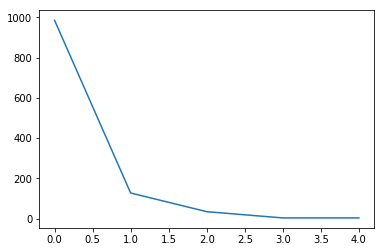

Percentage of gain: 0.07330485895107854
Total gain: 84.96033152430002
000000000000000000000000000000000000000000000000
Percentile:  0
[[124 333]
 [105 424]]
0.5557809330628803
Percentile:  1
[[15 37]
 [ 9 66]]
0.6377952755905512
Percentile:  2
[[ 5 16]
 [ 0 13]]
0.5294117647058824
Percentile:  3
[[3]]
1.0
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
3.5186302609745104
0.0
Diff in tren train and test
0.5185185185185185
0.5355285961871751
F1,score 0.4392156862745098
G-score: 0.49202694873591485
Accuracy 0.5043327556325823
Window: 4
[[358 178]
 [394 224]]
Vol pos 0.4111846638120677
Vol neg 0.4796311488100212


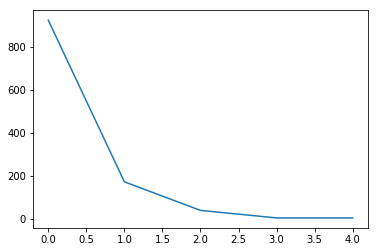

Percentage of gain: -0.030363555269244998
Total gain: -35.03954278070873
000000000000000000000000000000000000000000000000
Percentile:  0
[[298 141]
 [304 182]]
0.518918918918919
Percentile:  1
[[47 27]
 [66 33]]
0.4624277456647399
Percentile:  2
[[ 9  6]
 [19  6]]
0.375
Percentile:  3
[[1 1]
 [3 0]]
0.2
Percentile:  4
[[3 2]
 [0 0]]
0.6
000000000000000000000000000000000000000000000000
Working on... PYPL
4.9430161675059505
0.0
Diff in tren train and test
0.533923941227312
0.5324114088159032
F1,score 0.593866866118175
G-score: 0.5084358107154524
Accuracy 0.5306828003457217
Window: 4
[[217 324]
 [219 397]]
Vol pos 0.525117508978731
Vol neg 0.4817309104015384


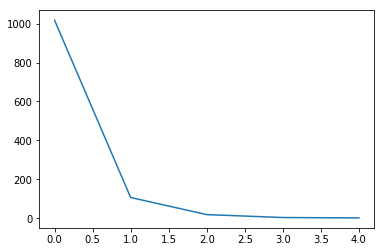

Percentage of gain: 0.05258622831884657
Total gain: 60.84226616490549
000000000000000000000000000000000000000000000000
Percentile:  0
[[188 284]
 [200 345]]
0.5240904621435595
Percentile:  1
[[26 29]
 [12 40]]
0.616822429906542
Percentile:  2
[[3 7]
 [5 4]]
0.3684210526315789
Percentile:  3
[[0 1]
 [0 3]]
0.75
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.47230206192292
0.0
Diff in tren train and test
0.5017301038062284
0.5242214532871973
F1,score 0.6354775828460039
G-score: 0.3943571373199369
Accuracy 0.5147058823529411
Window: 4
[[106 444]
 [117 489]]
Vol pos 0.3974386552190365
Vol neg 0.4233087160191091


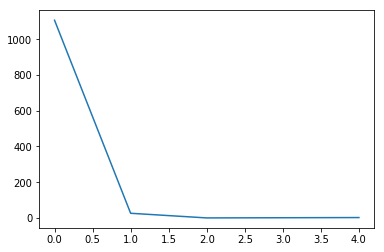

Percentage of gain: -0.0008652161171224037
Total gain: -1.0001898313934987
000000000000000000000000000000000000000000000000
Percentile:  0
[[100 436]
 [108 463]]
0.5085817524841915
Percentile:  1
[[ 6  4]
 [ 4 12]]
0.6923076923076923
Percentile:  2
Percentile:  3
[[0 1]
 [0 0]]
0.0
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
2.3891650603631978
0.0
Diff in tren train and test
0.52858380251191
0.5398613518197574
F1,score 0.15730337078651685
G-score: 0.2903470387439533
Accuracy 0.4800693240901213
Window: 4
[[498  33]
 [567  56]]
Vol pos 0.28951366902095327
Vol neg 0.31063131263451793


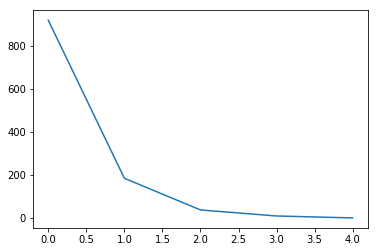

Percentage of gain: -0.022520116935097628
Total gain: -25.988214943102662
000000000000000000000000000000000000000000000000
Percentile:  0
[[407  25]
 [441  45]]
0.4923747276688453
Percentile:  1
[[77  5]
 [92 10]]
0.47282608695652173
Percentile:  2
[[10  2]
 [24  1]]
0.2972972972972973
Percentile:  3
[[4 1]
 [4 0]]
0.4444444444444444
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... QCOM
4.165966739459091
0.0
Diff in tren train and test
0.5101380500431406
0.5254529767040552
F1,score 0.5142378559463987
G-score: 0.49930239437340873
Accuracy 0.4995685936151855
Window: 4
[[272 278]
 [302 307]]
Vol pos 0.45821900932471415
Vol neg 0.4448880062121368


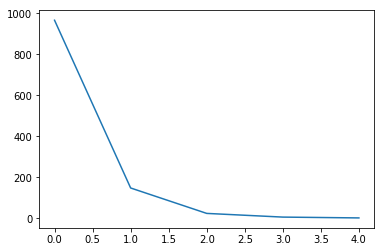

Percentage of gain: 0.006275895423615297
Total gain: 7.273762795970129
000000000000000000000000000000000000000000000000
Percentile:  0
[[234 235]
 [257 240]]
0.4906832298136646
Percentile:  1
[[31 42]
 [25 50]]
0.5472972972972973
Percentile:  2
[[7 1]
 [8 8]]
0.625
Percentile:  3
[[0 0]
 [4 2]]
0.3333333333333333
Percentile:  4
[[0 0]
 [2 0]]
0.0
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  25.815272487851907


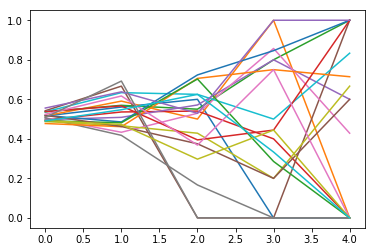

In [27]:
features=[100  ,99,  82,  84  ,53  ,52  ,51,  50,  49  ,48 , 41  ,45,  47  ,43,  77  ,46,  40,  42,
  61,  85 , 86 ,118 ,120 ,122 ,124 ,126 ,128 ,130 ,132  ,33  ,25  ,36 , 17  ,28 ,  9  ,37,
  35 , 34 , 20 , 29 ,  1 , 27  ,26  ,21,  12 , 19 , 39,  13  ,18,  11 ,  4,  38 ,  5,  10,
   3 ,111  ,63,  30  ,31  , 2]
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[4]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
       
        x=x[:,features]
        
        x=normalize(x,axis=0,norm='max')
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

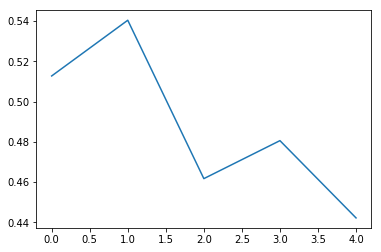

In [28]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
6.2151820652697705
0.0025906064609701575
Diff in tren train and test
0.5259050509429872
0.5602775368603643
F1,score 0.5816249050873197
G-score: 0.5060590614928433
Accuracy 0.5221162185602776
Window: 28
[[219 288]
 [263 383]]
Vol pos 0.873436630173891
Vol neg 1.0860781259548027


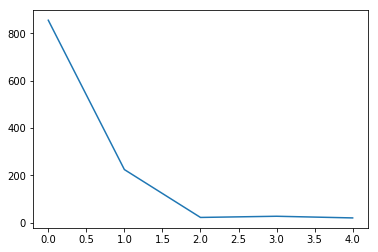

Percentage of gain: -0.06298369127182478
Total gain: -72.62019603641397
000000000000000000000000000000000000000000000000
Percentile:  0
[[174 229]
 [159 292]]
0.5456674473067916
Percentile:  1
[[42 57]
 [62 64]]
0.4711111111111111
Percentile:  2
[[ 3  1]
 [11  8]]
0.4782608695652174
Percentile:  3
[[ 0  0]
 [12 16]]
0.5714285714285714
Percentile:  4
[[ 0  0]
 [18  3]]
0.14285714285714285
000000000000000000000000000000000000000000000000
Working on... AMZN
12.157084770188899
0.000917344130579077
Diff in tren train and test
0.5682113469034213
0.6377816291161178
F1,score 0.17837235228539577
G-score: 0.29602807146814636
Accuracy 0.3613518197573657
Window: 28
[[337  81]
 [656  80]]
Vol pos 1.097839353548006
Vol neg 0.994871765319585


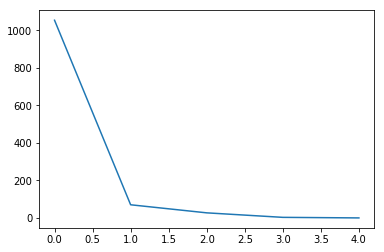

Percentage of gain: -0.2386667942903082
Total gain: -275.4214806110157
000000000000000000000000000000000000000000000000
Percentile:  0
[[316  68]
 [612  56]]
0.35361216730038025
Percentile:  1
[[17  9]
 [27 17]]
0.4857142857142857
Percentile:  2
[[ 4  3]
 [16  4]]
0.2962962962962963
Percentile:  3
[[0 0]
 [1 2]]
0.6666666666666666
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.3687214611872096
0.0
Diff in tren train and test
0.44881305637982194
0.75037147102526
F1,score 0.4979137691237831
G-score: 0.5297268740172671
Accuracy 0.4635958395245171
Window: 28
[[133  35]
 [326 179]]
Vol pos 0.6829376993715716
Vol neg 0.7358593070124496


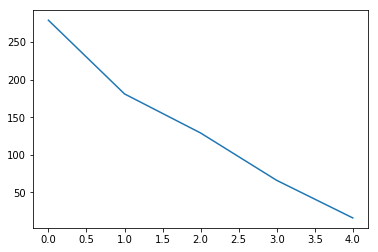

Percentage of gain: -0.07811091772297765
Total gain: -52.56864762756396
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 68  28]
 [104  79]]
0.5268817204301075
Percentile:  1
[[ 25   7]
 [104  45]]
0.3867403314917127
Percentile:  2
[[18  0]
 [73 38]]
0.43410852713178294
Percentile:  3
[[14  0]
 [38 14]]
0.42424242424242425
Percentile:  4
[[8 0]
 [6 2]]
0.625
000000000000000000000000000000000000000000000000
Working on... GOOGL
5.878547598584186
0.00042690345577337966
Diff in tren train and test
0.5547366139171905
0.562012142237641
F1,score 0.5479452054794521
G-score: 0.5116895373351519
Accuracy 0.5134431916738942
Window: 28
[[252 253]
 [308 340]]
Vol pos 1.2342437826655022
Vol neg 1.1825484150700667


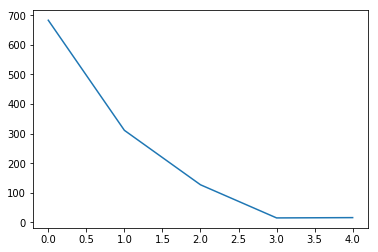

Percentage of gain: 0.05833708454784905
Total gain: 67.26265848366995
000000000000000000000000000000000000000000000000
Percentile:  0
[[185 146]
 [188 163]]
0.5102639296187683
Percentile:  1
[[ 45  80]
 [ 73 114]]
0.5096153846153846
Percentile:  2
[[ 6 17]
 [43 60]]
0.5238095238095238
Percentile:  3
[[2 6]
 [4 3]]
0.3333333333333333
Percentile:  4
[[12  4]
 [ 0  0]]
0.75
000000000000000000000000000000000000000000000000
Working on... MSFT
6.174452793204837
0.0
Diff in tren train and test
0.5552905464006939
0.5897658282740676
F1,score 0.42169728783902016
G-score: 0.43367097391652726
Accuracy 0.42671292281006074
Window: 28
[[251 222]
 [439 241]]
Vol pos 0.9321107430126696
Vol neg 0.7772966504821159


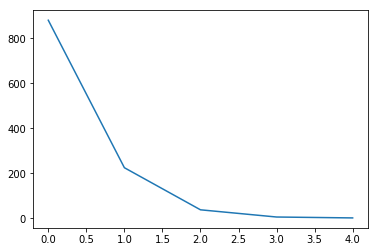

Percentage of gain: -0.0478704253308284
Total gain: -55.19460040644515
000000000000000000000000000000000000000000000000
Percentile:  0
[[199 163]
 [368 150]]
0.3965909090909091
Percentile:  1
[[49 44]
 [69 63]]
0.49777777777777776
Percentile:  2
[[ 3  8]
 [ 2 25]]
0.7368421052631579
Percentile:  3
[[0 5]
 [0 1]]
0.16666666666666666
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... FB
10.887151375939736
0.0
Diff in tren train and test
0.5323663130547738
0.58578856152513
F1,score 0.654421768707483
G-score: 0.49559533987682725
Accuracy 0.5597920277296361
Window: 28
[[165 313]
 [195 481]]
Vol pos 1.4224189722062361
Vol neg 1.1308880496206308


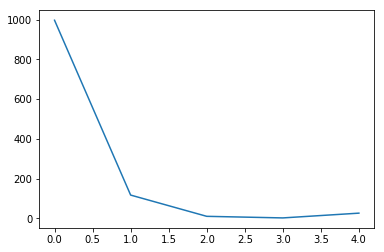

Percentage of gain: 0.29843286554414916
Total gain: 344.39152683794816
000000000000000000000000000000000000000000000000
Percentile:  0
[[159 284]
 [167 387]]
0.5476429287863591
Percentile:  1
[[ 5 20]
 [25 67]]
0.6153846153846154
Percentile:  2
[[1 9]
 [0 0]]
0.1
Percentile:  3
[[2]]
1.0
Percentile:  4
[[ 0  0]
 [ 3 23]]
0.8846153846153846
000000000000000000000000000000000000000000000000
Working on... INTC
8.395303326810174
0.0
Diff in tren train and test
0.5555315003247456
0.5433275563258232
F1,score 0.4949771689497718
G-score: 0.5202385581590295
Accuracy 0.5207972270363952
Window: 28
[[330 197]
 [356 271]]
Vol pos 1.2817122858385053
Vol neg 1.1511362800012201


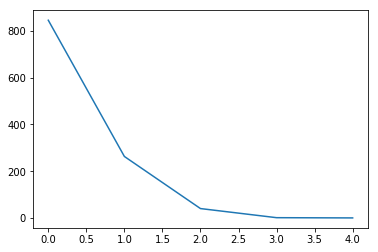

Percentage of gain: 0.11588450688757966
Total gain: 133.73072094826694
000000000000000000000000000000000000000000000000
Percentile:  0
[[227 150]
 [271 198]]
0.5023640661938534
Percentile:  1
[[77 38]
 [84 64]]
0.5361216730038023
Percentile:  2
[[25  9]
 [ 1  5]]
0.75
Percentile:  3
[[1]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... CSCO
5.061619718309853
0.0
Diff in tren train and test
0.5903745644599303
0.5213600697471665
F1,score 0.5457543281121188
G-score: 0.5168924273317891
Accuracy 0.5196163905841326
Window: 28
[[265 284]
 [267 331]]
Vol pos 0.9794775473357926
Vol neg 0.9014213496935553


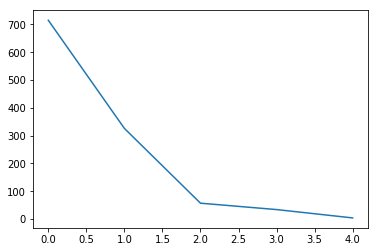

Percentage of gain: 0.07592454623451046
Total gain: 87.0854545309835
000000000000000000000000000000000000000000000000
Percentile:  0
[[148 175]
 [162 230]]
0.5286713286713287
Percentile:  1
[[76 94]
 [79 77]]
0.46932515337423314
Percentile:  2
[[18  9]
 [22  8]]
0.45614035087719296
Percentile:  3
[[18  6]
 [ 1  9]]
0.7941176470588235
Percentile:  4
[[4]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
8.98261429491308
0.0
Diff in tren train and test
0.4686011260285838
0.5051993067590987
F1,score 0.10572687224669602
G-score: 0.2346160993352393
Accuracy 0.47227036395147315
Window: 28
[[509  62]
 [547  36]]
Vol pos 1.4623414884087056
Vol neg 1.4436260812082198


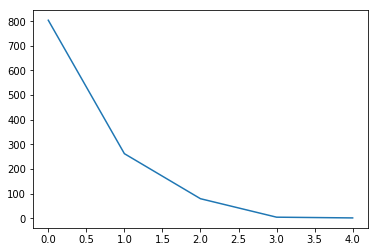

Percentage of gain: -0.07122371947405665
Total gain: -82.19217227306137
000000000000000000000000000000000000000000000000
Percentile:  0
[[343  48]
 [381  32]]
0.4664179104477612
Percentile:  1
[[128  12]
 [120   2]]
0.4961832061068702
Percentile:  2
[[36  2]
 [41  0]]
0.45569620253164556
Percentile:  3
[[2 0]
 [2 0]]
0.5
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
7.248431726389965
0.007644967700004514
Diff in tren train and test
0.5743667460489283
0.5805892547660312
F1,score 0.39246778989098113
G-score: 0.4576353593382938
Accuracy 0.46880415944540726
Window: 28
[[343 141]
 [472 198]]
Vol pos 1.4686397560664892
Vol neg 1.4091361053349378


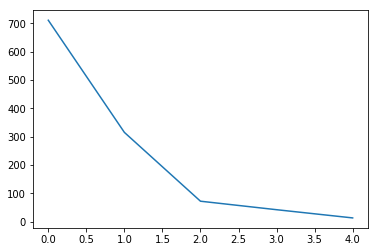

Percentage of gain: -0.060022811558358945
Total gain: -69.26632453834623
000000000000000000000000000000000000000000000000
Percentile:  0
[[237  80]
 [292 103]]
0.47752808988764045
Percentile:  1
[[ 92  29]
 [145  47]]
0.4440894568690096
Percentile:  2
[[12 10]
 [30 21]]
0.4520547945205479
Percentile:  3
[[ 2 19]
 [ 3 17]]
0.4634146341463415
Percentile:  4
[[0 3]
 [1 9]]
0.6923076923076923
000000000000000000000000000000000000000000000000
Working on... NFLX
7.410943467100719
0.001406110187899634
Diff in tren train and test
0.56691208315288
0.610051993067591
F1,score 0.32377049180327866
G-score: 0.40936018074033237
Accuracy 0.42807625649913345
Window: 28
[[336 114]
 [546 158]]
Vol pos 1.5369421972848532
Vol neg 1.6276772258965315


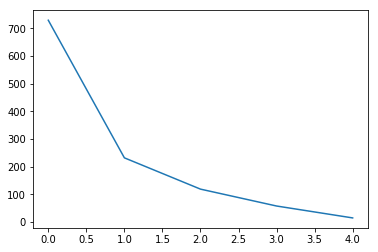

Percentage of gain: -0.2729787899765973
Total gain: -315.0175236329933
000000000000000000000000000000000000000000000000
Percentile:  0
[[266  84]
 [305  73]]
0.46565934065934067
Percentile:  1
[[ 46  17]
 [144  25]]
0.30603448275862066
Percentile:  2
[[10  5]
 [67 37]]
0.3949579831932773
Percentile:  3
[[ 6  5]
 [27 20]]
0.4482758620689655
Percentile:  4
[[7 3]
 [3 2]]
0.6
000000000000000000000000000000000000000000000000
Working on... BKNG
2.5815320081626525
0.0014318988888343074
Diff in tren train and test
0.5552256532066508
0.6166666666666667
F1,score 0.5693430656934306
G-score: 0.5945869641032201
Accuracy 0.5785714285714286
Window: 28
[[126  35]
 [142 117]]
Vol pos 0.5772503496734974
Vol neg 0.5173910924875724


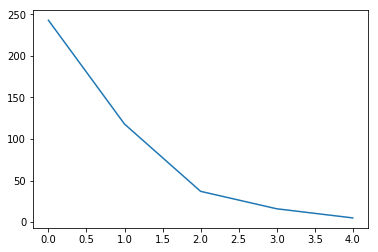

Percentage of gain: 0.11593717047704657
Total gain: 48.69361160035956
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 75  18]
 [105  44]]
0.49173553719008267
Percentile:  1
[[44  2]
 [26 46]]
0.7627118644067796
Percentile:  2
[[ 6  2]
 [ 6 23]]
0.7837837837837838
Percentile:  3
[[0 9]
 [4 3]]
0.1875
Percentile:  4
[[0 4]
 [1 1]]
0.16666666666666666
000000000000000000000000000000000000000000000000
Working on... ADBE
5.959915611814346
0.0
Diff in tren train and test
0.5740017361111112
0.6611642050390965
F1,score 0.46666666666666673
G-score: 0.46683173737430605
Accuracy 0.4439617723718506
Window: 28
[[231 159]
 [481 280]]
Vol pos 1.2607881769719533
Vol neg 1.0018672138238058


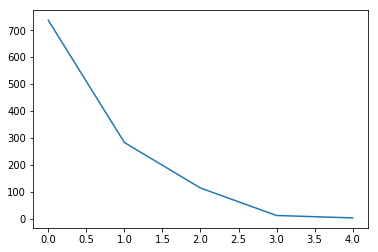

Percentage of gain: 0.0026652837406016387
Total gain: 3.0677415854324863
000000000000000000000000000000000000000000000000
Percentile:  0
[[123 106]
 [349 159]]
0.38263229308005425
Percentile:  1
[[70 34]
 [91 88]]
0.558303886925795
Percentile:  2
[[26 19]
 [41 28]]
0.47368421052631576
Percentile:  3
[[8 0]
 [0 4]]
1.0
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
5.291005291005295
0.0
Diff in tren train and test
0.5079607415485278
0.6003490401396161
F1,score 0.5044462409054162
G-score: 0.4677851983273353
Accuracy 0.4650959860383944
Window: 28
[[221 237]
 [376 312]]
Vol pos 1.1258632224258456
Vol neg 0.9689551273103924


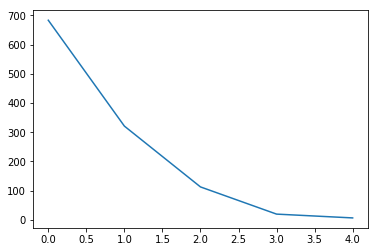

Percentage of gain: 0.005336478631505323
Total gain: 6.115604511705101
000000000000000000000000000000000000000000000000
Percentile:  0
[[134 149]
 [235 165]]
0.4377745241581259
Percentile:  1
[[ 45  60]
 [115 101]]
0.45482866043613707
Percentile:  2
[[24 19]
 [25 45]]
0.6106194690265486
Percentile:  3
[[13  6]
 [ 1  0]]
0.65
Percentile:  4
[[5 2]
 [0 0]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... TXN
5.987780040733193
0.0
Diff in tren train and test
0.6268139484513754
0.5901213171577123
F1,score 0.6904577191621413
G-score: 0.6544202449595455
Accuracy 0.6542461005199307
Window: 28
[[310 163]
 [236 445]]
Vol pos 1.0608925908134939
Vol neg 0.7350787901215232


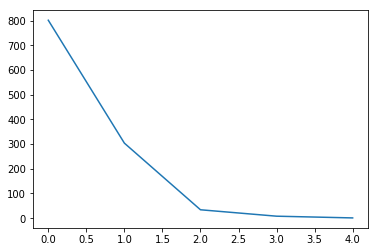

Percentage of gain: 0.4399284825006067
Total gain: 507.6774688057001
000000000000000000000000000000000000000000000000
Percentile:  0
[[262 114]
 [199 227]]
0.6097256857855362
Percentile:  1
[[ 47  49]
 [ 34 174]]
0.7269736842105263
Percentile:  2
[[ 1  0]
 [ 0 33]]
1.0
Percentile:  3
[[8]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
5.610368642927625
0.0
Diff in tren train and test
0.48368856024358414
0.6127067014795474
F1,score 0.6569729015201586
G-score: 0.4593436106061547
Accuracy 0.5483028720626631
Window: 28
[[133 312]
 [207 497]]
Vol pos 1.3368645301921587
Vol neg 1.0918999941957772


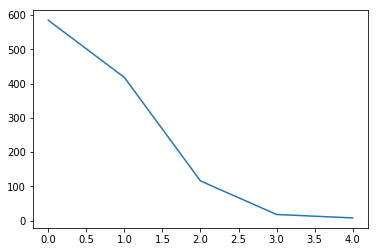

Percentage of gain: 0.23979857009003616
Total gain: 275.52855703345153
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 33 164]
 [133 255]]
0.49230769230769234
Percentile:  1
[[ 75 119]
 [ 60 164]]
0.5717703349282297
Percentile:  2
[[17 25]
 [11 63]]
0.6896551724137931
Percentile:  3
[[6 4]
 [1 7]]
0.7222222222222222
Percentile:  4
[[2 0]
 [2 4]]
0.75
000000000000000000000000000000000000000000000000
Working on... PYPL
6.66413758219524
0.0
Diff in tren train and test
0.5868952050336299
0.6302083333333334
F1,score 0.5403726708074534
G-score: 0.4884098821031556
Accuracy 0.4861111111111111
Window: 28
[[212 214]
 [378 348]]
Vol pos 1.3848542695348567
Vol neg 1.3255390100984776


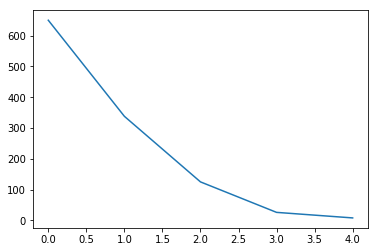

Percentage of gain: -0.007986721387828903
Total gain: -9.200703038778897
000000000000000000000000000000000000000000000000
Percentile:  0
[[138 100]
 [227 185]]
0.4969230769230769
Percentile:  1
[[ 31  73]
 [120 114]]
0.4289940828402367
Percentile:  2
[[31 26]
 [27 41]]
0.576
Percentile:  3
[[ 8 10]
 [ 1  7]]
0.5769230769230769
Percentile:  4
[[3 5]
 [0 0]]
0.375
000000000000000000000000000000000000000000000000
Working on... GILD
7.934752557367997
0.0
Diff in tren train and test
0.4751357220412595
0.5360556038227628
F1,score 0.6880733944954128
G-score: 0.4888910318515711
Accuracy 0.5864465682015638
Window: 28
[[150 384]
 [ 92 525]]
Vol pos 1.0069317658420955
Vol neg 1.1211218627388562


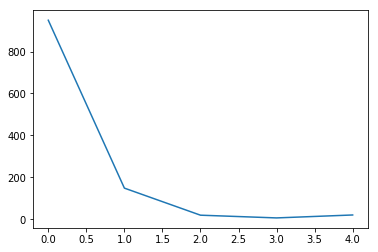

Percentage of gain: 0.1268678846913284
Total gain: 146.024935279719
000000000000000000000000000000000000000000000000
Percentile:  0
[[118 323]
 [ 84 424]]
0.571127502634352
Percentile:  1
[[19 29]
 [ 6 95]]
0.7651006711409396
Percentile:  2
[[7 9]
 [1 3]]
0.5
Percentile:  3
[[1 6]
 [0 0]]
0.14285714285714285
Percentile:  4
[[ 5 16]
 [ 0  0]]
0.23809523809523808
000000000000000000000000000000000000000000000000
Working on... COST
2.7652341569841132
0.0027343749999936273
Diff in tren train and test
0.5562078712763644
0.577023498694517
F1,score 0.163265306122449
G-score: 0.2919064788574157
Accuracy 0.4290687554395126
Window: 28
[[429  57]
 [599  64]]
Vol pos 0.6391598335649717
Vol neg 0.759284894630258


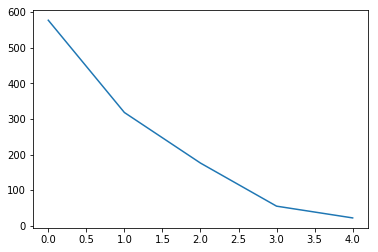

Percentage of gain: -0.15925595555258326
Total gain: -182.98509292991815
000000000000000000000000000000000000000000000000
Percentile:  0
[[229  37]
 [275  38]]
0.46113989637305697
Percentile:  1
[[112  19]
 [165  20]]
0.4177215189873418
Percentile:  2
[[73  1]
 [97  5]]
0.4431818181818182
Percentile:  3
[[13  0]
 [40  1]]
0.25925925925925924
Percentile:  4
[[ 2  0]
 [20  0]]
0.09090909090909091
000000000000000000000000000000000000000000000000
Working on... QCOM
6.459999999999993
0.0
Diff in tren train and test
0.5057396577864414
0.5771230502599654
F1,score 0.5252201761409127
G-score: 0.48491749921674343
Accuracy 0.4861351819757366
Window: 28
[[233 255]
 [338 328]]
Vol pos 1.4006994395793149
Vol neg 1.1138108619784677


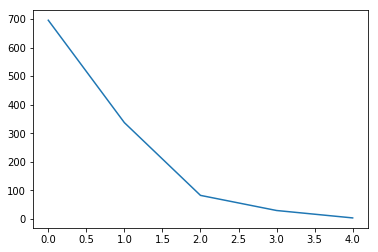

Percentage of gain: 0.1085810610491892
Total gain: 125.30254445076434
000000000000000000000000000000000000000000000000
Percentile:  0
[[149 158]
 [219 170]]
0.4583333333333333
Percentile:  1
[[75 82]
 [87 93]]
0.49851632047477745
Percentile:  2
[[ 9 15]
 [27 31]]
0.4878048780487805
Percentile:  3
[[29]]
1.0
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  31.5207041486732


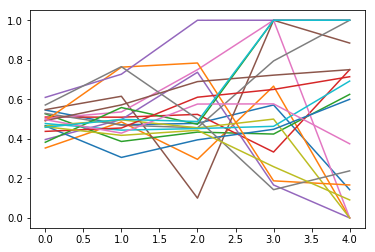

In [29]:
features=[100  ,99,  82,  84  ,53  ,52  ,51,  50,  49  ,48 , 41  ,45,  47  ,43,  77  ,46,  40,  42,
  61,  85 , 86 ,118 ,120 ,122 ,124 ,126 ,128 ,130 ,132  ,33  ,25  ,36 , 17  ,28 ,  9  ,37,
  35 , 34 , 20 , 29 ,  1 , 27  ,26  ,21,  12 , 19 , 39,  13  ,18,  11 ,  4,  38 ,  5,  10,
   3 ,111  ,63,  30  ,31  , 2]
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
       
        x=x[:,features]
        
        x=normalize(x,axis=0,norm='max')
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

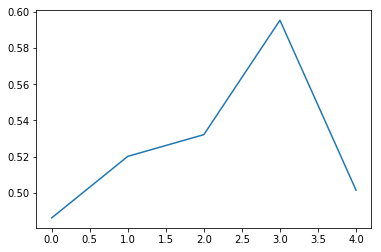

In [30]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.270476249727803
0.0052039966694373985
Diff in tren train and test
0.5556300268096515
0.6091234347048301
F1,score 0.35974304068522484
G-score: 0.4457708834830915
Accuracy 0.46511627906976744
Window: 200
[[352  85]
 [513 168]]
Vol pos 4.95565074818992
Vol neg 3.561691628273678


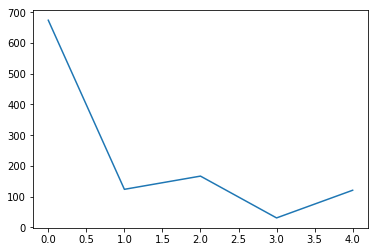

Percentage of gain: 0.39986296543032096
Total gain: 447.0467953510988
000000000000000000000000000000000000000000000000
Percentile:  0
[[276   3]
 [373  21]]
0.4413075780089153
Percentile:  1
[[36 33]
 [44 11]]
0.3790322580645161
Percentile:  2
[[36 45]
 [62 24]]
0.3592814371257485
Percentile:  3
[[ 4  4]
 [ 2 21]]
0.8064516129032258
Percentile:  4
[[ 0  0]
 [31 90]]
0.743801652892562
000000000000000000000000000000000000000000000000
Working on... AMZN
11.321930760535398
0.0025179720253285087
Diff in tren train and test
0.7125
0.8303571428571429
F1,score 0.33418584825234443
G-score: 0.39827017019396155
Accuracy 0.3026785714285714
Window: 200
[[143  47]
 [734 196]]
Vol pos 2.3947042946569317
Vol neg 3.0901744664822495


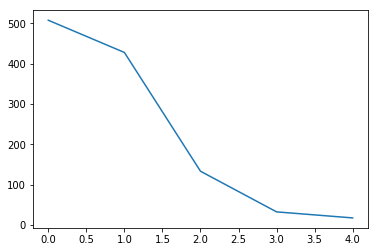

Percentage of gain: -1.4300191986017294
Total gain: -1601.621502433937
000000000000000000000000000000000000000000000000
Percentile:  0
[[141  47]
 [256  64]]
0.4035433070866142
Percentile:  1
[[  2   0]
 [332  94]]
0.22429906542056074
Percentile:  2
[[  0   0]
 [111  22]]
0.16541353383458646
Percentile:  3
[[ 0  0]
 [20 12]]
0.375
Percentile:  4
[[ 0  0]
 [13  4]]
0.23529411764705882
000000000000000000000000000000000000000000000000
Working on... PEP
7.1599283011352295
0.0
Diff in tren train and test
0.31000781860828774
0.9765258215962441
F1,score 0.3426294820717131
G-score: 0.45467655452064953
Accuracy 0.22535211267605634
Window: 200
[[ 15   0]
 [495 129]]
Vol pos 2.6042297503928746
Vol neg 2.745115001085336


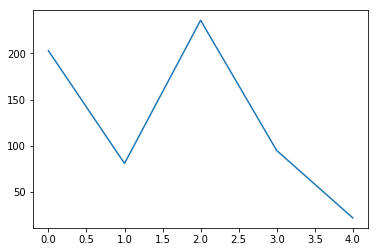

Percentage of gain: -1.5396288599071477
Total gain: -983.8228414806674
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 15   0]
 [141  47]]
0.3054187192118227
Percentile:  1
[[ 0  0]
 [69 12]]
0.14814814814814814
Percentile:  2
[[  0   0]
 [209  27]]
0.11440677966101695
Percentile:  3
[[ 0  0]
 [52 43]]
0.45263157894736844
Percentile:  4
[[ 0  0]
 [22  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.972699216586207
0.0019559137050855525
Diff in tren train and test
0.6362823949955317
0.6574239713774598
F1,score 0.6762177650429799
G-score: 0.5703334028488457
Accuracy 0.5957066189624329
Window: 200
[[194 189]
 [263 472]]
Vol pos 3.8312556942521114
Vol neg 2.8537464706571773


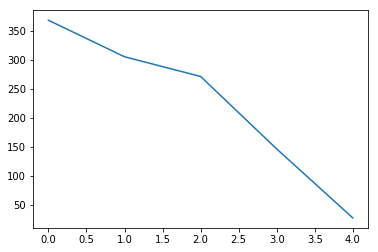

Percentage of gain: 1.1285535667574793
Total gain: 1261.722887634862
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76 105]
 [101  85]]
0.43869209809264303
Percentile:  1
[[ 55  45]
 [ 60 145]]
0.6557377049180327
Percentile:  2
[[ 55  37]
 [ 64 115]]
0.6273062730627307
Percentile:  3
[[  8   2]
 [ 32 104]]
0.7671232876712328
Percentile:  4
[[ 0  0]
 [ 6 21]]
0.7777777777777778
000000000000000000000000000000000000000000000000
Working on... MSFT
5.8924023311029625
0.0
Diff in tren train and test
0.6748603351955307
0.6851520572450805
F1,score 0.19853709508881923
G-score: 0.30032816926998623
Accuracy 0.313953488372093
Window: 200
[[256  96]
 [671  95]]
Vol pos 1.412898351392242
Vol neg 1.9973901578576454


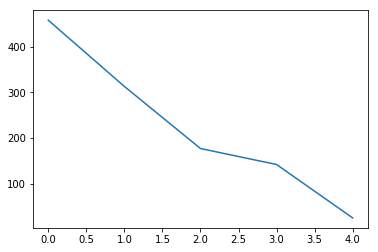

Percentage of gain: -0.9267181840233786
Total gain: -1036.0709297381372
000000000000000000000000000000000000000000000000
Percentile:  0
[[155  49]
 [221  33]]
0.4104803493449782
Percentile:  1
[[ 79  45]
 [168  21]]
0.3194888178913738
Percentile:  2
[[ 21   2]
 [139  15]]
0.2033898305084746
Percentile:  3
[[  1   0]
 [121  20]]
0.14788732394366197
Percentile:  4
[[ 0  0]
 [20  5]]
0.2
000000000000000000000000000000000000000000000000
Working on... FB
12.336073288573756
0.010328444536258126
Diff in tren train and test
0.5438518187904485
0.8696428571428572
F1,score 0.6205023761031908
G-score: 0.5781211572493121
Accuracy 0.5008928571428571
Window: 200
[[104  42]
 [517 457]]
Vol pos 3.9064183006048943
Vol neg 3.182111926090253


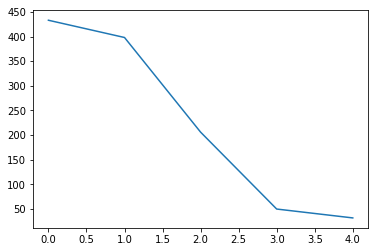

Percentage of gain: 0.3684822321025842
Total gain: 412.7000999548943
000000000000000000000000000000000000000000000000
Percentile:  0
[[104   5]
 [220 105]]
0.4815668202764977
Percentile:  1
[[  0  36]
 [171 190]]
0.47858942065491183
Percentile:  2
[[  0   1]
 [118  87]]
0.4223300970873786
Percentile:  3
[[ 0  0]
 [ 7 42]]
0.8571428571428571
Percentile:  4
[[32]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
7.207444473707307
0.0
Diff in tren train and test
0.6317786208435617
0.5767857142857142
F1,score 0.5161887141535615
G-score: 0.5382824640742395
Accuracy 0.5330357142857143
Window: 200
[[318 156]
 [367 279]]
Vol pos 2.6327928455140266
Vol neg 2.2151107573123414


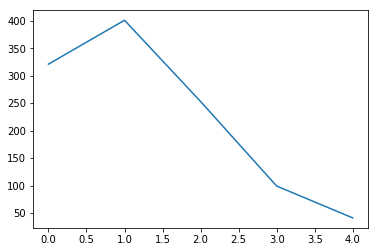

Percentage of gain: 0.36899500240849953
Total gain: 413.27440269751946
000000000000000000000000000000000000000000000000
Percentile:  0
[[105  65]
 [100  51]]
0.48598130841121495
Percentile:  1
[[118  53]
 [146  84]]
0.5037406483790524
Percentile:  2
[[69 16]
 [96 72]]
0.5573122529644269
Percentile:  3
[[11 11]
 [21 56]]
0.6767676767676768
Percentile:  4
[[14 11]
 [ 2 14]]
0.6829268292682927
000000000000000000000000000000000000000000000000
Working on... CSCO
6.408313487767918
0.011134617525877858
Diff in tren train and test
0.7121688370004491
0.5992812219227314
F1,score 0.5525070955534531
G-score: 0.5844544926738343
Accuracy 0.5750224618149147
Window: 200
[[348  98]
 [375 292]]
Vol pos 2.6778971852734155
Vol neg 1.5161219656274572


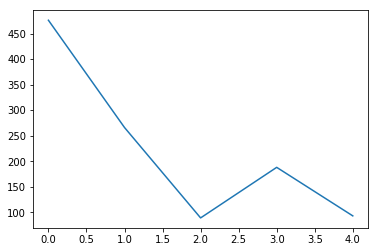

Percentage of gain: 0.8955332514224607
Total gain: 996.7285088331987
000000000000000000000000000000000000000000000000
Percentile:  0
[[132  71]
 [183  93]]
0.4697286012526096
Percentile:  1
[[ 16  23]
 [108 115]]
0.5
Percentile:  2
[[ 9  4]
 [49 30]]
0.42391304347826086
Percentile:  3
[[114   0]
 [ 31  43]]
0.8351063829787234
Percentile:  4
[[76  0]
 [ 3 11]]
0.9666666666666667
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.116774878445044
0.0
Diff in tren train and test
0.44776785714285716
0.5348214285714286
F1,score 0.48888888888888893
G-score: 0.5071150299177569
Accuracy 0.5071428571428571
Window: 200
[[304 217]
 [335 264]]
Vol pos 3.3920664083959844
Vol neg 3.3537452801244703


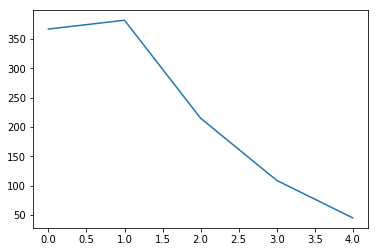

Percentage of gain: 0.06734493333947467
Total gain: 75.42632534021163
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 69  69]
 [123 106]]
0.4768392370572207
Percentile:  1
[[ 84  79]
 [130  89]]
0.45287958115183247
Percentile:  2
[[96 39]
 [32 48]]
0.6697674418604651
Percentile:  3
[[48 18]
 [23 20]]
0.6238532110091743
Percentile:  4
[[ 7 12]
 [26  0]]
0.15555555555555556
000000000000000000000000000000000000000000000000
Working on... NVDA
16.150883867675034
0.0019193489568320964
Diff in tren train and test
0.6511939299263557
0.6419642857142858
F1,score 0.4773519163763066
G-score: 0.48351082700869025
Accuracy 0.4642857142857143
Window: 200
[[246 155]
 [445 274]]
Vol pos 5.806601479913806
Vol neg 3.6963161956643247


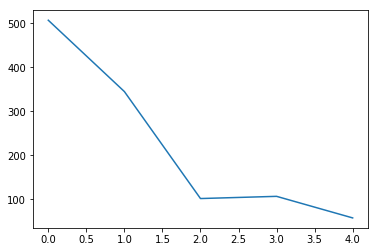

Percentage of gain: 0.7157527251398075
Total gain: 801.6430521565844
000000000000000000000000000000000000000000000000
Percentile:  0
[[144  69]
 [246  47]]
0.3774703557312253
Percentile:  1
[[ 93  76]
 [118  58]]
0.43768115942028984
Percentile:  2
[[ 9 10]
 [53 30]]
0.38235294117647056
Percentile:  3
[[ 0  0]
 [11 96]]
0.897196261682243
Percentile:  4
[[ 0  0]
 [16 42]]
0.7241379310344828
000000000000000000000000000000000000000000000000
Working on... NFLX
16.219868718627612
0.0
Diff in tren train and test
0.6252232142857143
0.7955357142857142
F1,score 0.10062893081761005
G-score: 0.22437316398995352
Accuracy 0.23392857142857143
Window: 200
[[214  15]
 [843  48]]
Vol pos 4.094034961487662
Vol neg 5.729491134488345


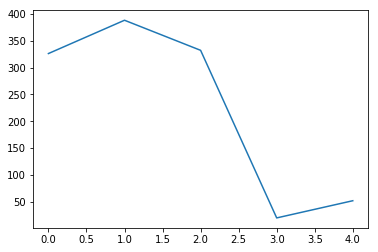

Percentage of gain: -3.4314877084653865
Total gain: -3843.266233481233
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 88   0]
 [234   4]]
0.2822085889570552
Percentile:  1
[[ 85  14]
 [255  34]]
0.30670103092783507
Percentile:  2
[[ 41   1]
 [280  10]]
0.1536144578313253
Percentile:  3
[[ 0  0]
 [20  0]]
0.0
Percentile:  4
[[ 0  0]
 [52  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
4.336126439130737
0.0018669255470074874
Diff in tren train and test
0.5258732212160414
0.7046632124352331
F1,score 0.8153846153846154
G-score: 0.09244556036147412
Accuracy 0.689119170984456
Window: 200
[[  1 113]
 [  7 265]]
Vol pos 1.908692118939672
Vol neg 0.5215326325293459


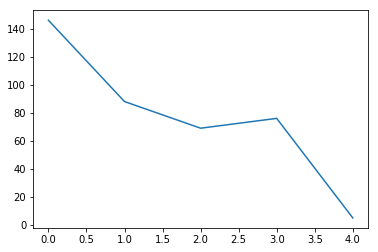

Percentage of gain: 1.153181833508889
Total gain: 445.12818773443126
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 1 99]
 [ 3 43]]
0.3013698630136986
Percentile:  1
[[ 0 12]
 [ 4 72]]
0.8181818181818182
Percentile:  2
[[ 0  1]
 [ 0 68]]
0.9855072463768116
Percentile:  3
[[76]]
1.0
Percentile:  4
[[5]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.848536613142013
0.002086767805344401
Diff in tren train and test
0.7138702460850112
0.7242614145031334
F1,score 0.7991746905089407
G-score: 0.7542813337039432
Accuracy 0.738585496866607
Window: 200
[[244  64]
 [228 581]]
Vol pos 3.5469442358399643
Vol neg 2.1958541640384746


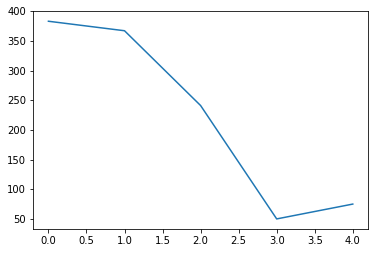

Percentage of gain: 2.045693445540498
Total gain: 2285.039578668736
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 94  46]
 [116 127]]
0.577023498694517
Percentile:  1
[[111  13]
 [ 62 181]]
0.7956403269754768
Percentile:  2
[[ 38   5]
 [ 45 152]]
0.7916666666666666
Percentile:  3
[[ 0  0]
 [ 5 45]]
0.9
Percentile:  4
[[75]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
5.841163444850075
0.007105975040131699
Diff in tren train and test
0.5184352517985612
0.7821782178217822
F1,score 0.7578558225508318
G-score: 0.5488309558697944
Accuracy 0.6462646264626463
Window: 200
[[103 139]
 [254 615]]
Vol pos 2.5425412566933234
Vol neg 2.0886485175893914


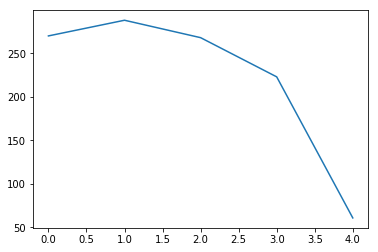

Percentage of gain: 0.9043256119650546
Total gain: 1004.7057548931756
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 35  18]
 [104 116]]
0.5531135531135531
Percentile:  1
[[ 17  26]
 [ 82 163]]
0.625
Percentile:  2
[[ 19  44]
 [ 50 153]]
0.6466165413533834
Percentile:  3
[[ 30  38]
 [ 16 137]]
0.755656108597285
Percentile:  4
[[ 2 13]
 [ 1 45]]
0.7704918032786885
000000000000000000000000000000000000000000000000
Working on... TXN
9.594205774382367
0.0
Diff in tren train and test
0.6787946428571429
0.7211796246648794
F1,score 0.5231560891938251
G-score: 0.559043636433553
Accuracy 0.5031277926720286
Window: 200
[[258  54]
 [502 305]]
Vol pos 2.74518338124863
Vol neg 3.493638458078211


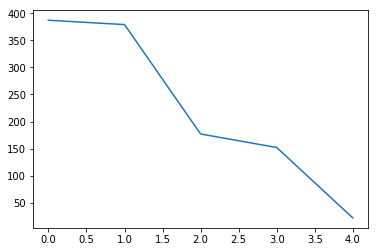

Percentage of gain: -0.3547137971836522
Total gain: -396.9247390485068
000000000000000000000000000000000000000000000000
Percentile:  0
[[134  20]
 [146  87]]
0.5710594315245479
Percentile:  1
[[110  33]
 [134 102]]
0.5593667546174143
Percentile:  2
[[ 14   1]
 [105  57]]
0.4011299435028249
Percentile:  3
[[  0   0]
 [105  47]]
0.3092105263157895
Percentile:  4
[[ 0  0]
 [12 10]]
0.45454545454545453
000000000000000000000000000000000000000000000000
Working on... AVGO
9.981040657257227
0.0025934464021118834
Diff in tren train and test
0.4697309417040359
0.6932735426008969
F1,score 0.6528066528066528
G-score: 0.5047492383844803
Accuracy 0.5506726457399103
Window: 200
[[143 199]
 [302 471]]
Vol pos 3.9196237870954542
Vol neg 4.32451462578021


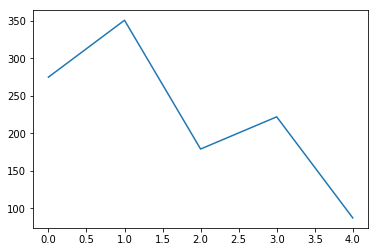

Percentage of gain: 0.21530688588405741
Total gain: 240.06717776072398
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 30  61]
 [ 36 147]]
0.6459854014598541
Percentile:  1
[[ 44  56]
 [132 120]]
0.4659090909090909
Percentile:  2
[[19 22]
 [46 91]]
0.6179775280898876
Percentile:  3
[[44 30]
 [60 88]]
0.5945945945945946
Percentile:  4
[[ 6 30]
 [27 24]]
0.3448275862068966
000000000000000000000000000000000000000000000000
Working on... PYPL
11.940298507462696
0.005534927156825336
Diff in tren train and test
0.7345706618962433
0.7493285586392122
F1,score 0.5327446651949963
G-score: 0.43052974667869076
Accuracy 0.4315129811996419
Window: 200
[[120 160]
 [475 362]]
Vol pos 4.318702239399654
Vol neg 3.3679483312117835


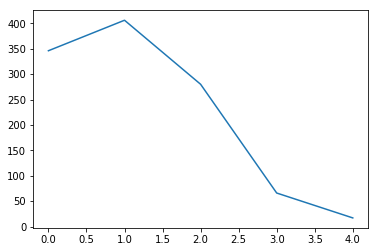

Percentage of gain: -0.05105882804731348
Total gain: -57.032710928849156
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 25  46]
 [198  79]]
0.2988505747126437
Percentile:  1
[[ 24  57]
 [191 132]]
0.38613861386138615
Percentile:  2
[[ 53  22]
 [ 74 130]]
0.6559139784946236
Percentile:  3
[[18 31]
 [ 1 16]]
0.5151515151515151
Percentile:  4
[[0 4]
 [9 5]]
0.2777777777777778
000000000000000000000000000000000000000000000000
Working on... GILD
12.784895482130821
0.0
Diff in tren train and test
0.477170993733214
0.48566308243727596
F1,score 0.6450592885375495
G-score: 0.582806483006123
Accuracy 0.5976702508960573
Window: 200
[[259 315]
 [134 408]]
Vol pos 4.611771503463532
Vol neg 3.532206916945105


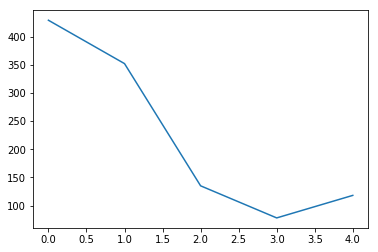

Percentage of gain: 1.3352067088726018
Total gain: 1490.0906871018237
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 84 168]
 [ 58 119]]
0.4731934731934732
Percentile:  1
[[ 44  78]
 [ 51 179]]
0.6335227272727273
Percentile:  2
[[  2   1]
 [ 24 108]]
0.8148148148148148
Percentile:  3
[[55 23]
 [ 0  0]]
0.7051282051282052
Percentile:  4
[[73 45]
 [ 0  0]]
0.6186440677966102
000000000000000000000000000000000000000000000000
Working on... COST
5.257825954817153
0.0
Diff in tren train and test
0.675857431069267
0.7031390134529149
F1,score 0.4744408945686901
G-score: 0.427923550002103
Accuracy 0.4098654708520179
Window: 200
[[160 171]
 [487 297]]
Vol pos 1.415012772887854
Vol neg 1.7297444149016672


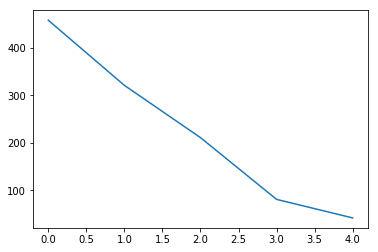

Percentage of gain: -0.4408170294130473
Total gain: -491.51098779554775
000000000000000000000000000000000000000000000000
Percentile:  0
[[104 134]
 [115 105]]
0.45633187772925765
Percentile:  1
[[ 56  32]
 [137  96]]
0.4735202492211838
Percentile:  2
[[  0   5]
 [143  63]]
0.2985781990521327
Percentile:  3
[[ 0  0]
 [74  7]]
0.08641975308641975
Percentile:  4
[[ 0  0]
 [17 25]]
0.5952380952380952
000000000000000000000000000000000000000000000000
Working on... QCOM
15.039417828987261
0.008409014463509178
Diff in tren train and test
0.4767857142857143
0.7256478999106345
F1,score 0.6662242866622428
G-score: 0.47913410128146683
Accuracy 0.550491510277033
Window: 200
[[114 193]
 [310 502]]
Vol pos 5.470082058586441
Vol neg 3.4717027846319124


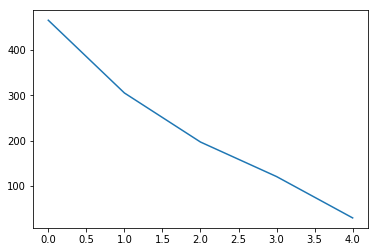

Percentage of gain: 1.4506738582836423
Total gain: 1623.3040474193956
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 23 106]
 [156 182]]
0.43897216274089934
Percentile:  1
[[ 25  46]
 [113 118]]
0.4735099337748344
Percentile:  2
[[ 24  22]
 [ 32 119]]
0.7258883248730964
Percentile:  3
[[42 17]
 [ 8 54]]
0.7933884297520661
Percentile:  4
[[ 0  2]
 [ 0 28]]
0.9333333333333333
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  154.33137803198883


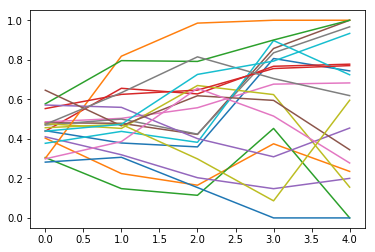

In [31]:
features=[100  ,99,  82,  84  ,53  ,52  ,51,  50,  49  ,48 , 41  ,45,  47  ,43,  77  ,46,  40,  42,
  61,  85 , 86 ,118 ,120 ,122 ,124 ,126 ,128 ,130 ,132  ,33  ,25  ,36 , 17  ,28 ,  9  ,37,
  35 , 34 , 20 , 29 ,  1 , 27  ,26  ,21,  12 , 19 , 39,  13  ,18,  11 ,  4,  38 ,  5,  10,
   3 ,111  ,63,  30  ,31  , 2]
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
       
        x=x[:,features]
        
        x=normalize(x,axis=0,norm='max')
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

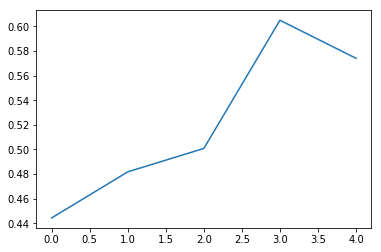

In [32]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [ ]:
#NOW RUNNING WITH MOVING AVERAGE ON THE SENTIMENT
tempacc=accstocksresults


In [ ]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()